R² Score: 0.9188
Mean Squared Error: 335.6547


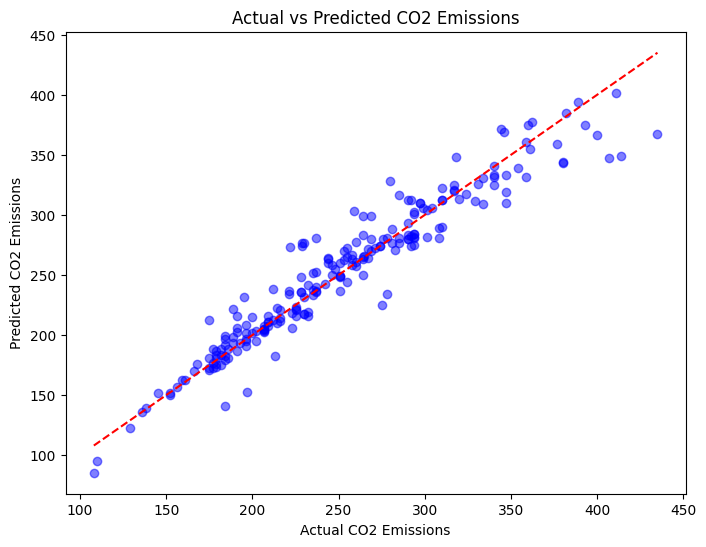

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the dfset
df = pd.read_csv('fuel_consumption_dataset.csv')

# cleaning the rown with missing df in the dfframe
df.replace("?", np.nan , inplace=True )
df.dropna(inplace=True)

ld = LabelEncoder()
df['MAKE'] = ld.fit_transform(df['MAKE'])
df['MODEL'] = ld.fit_transform(df['MODEL'])
df['VEHICLECLASS'] = ld.fit_transform(df['VEHICLECLASS'])
df['TRANSMISSION'] = ld.fit_transform(df['TRANSMISSION'])
df['FUELTYPE']=ld.fit_transform(df['FUELTYPE'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale the df
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split the df into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CO2 emissions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()

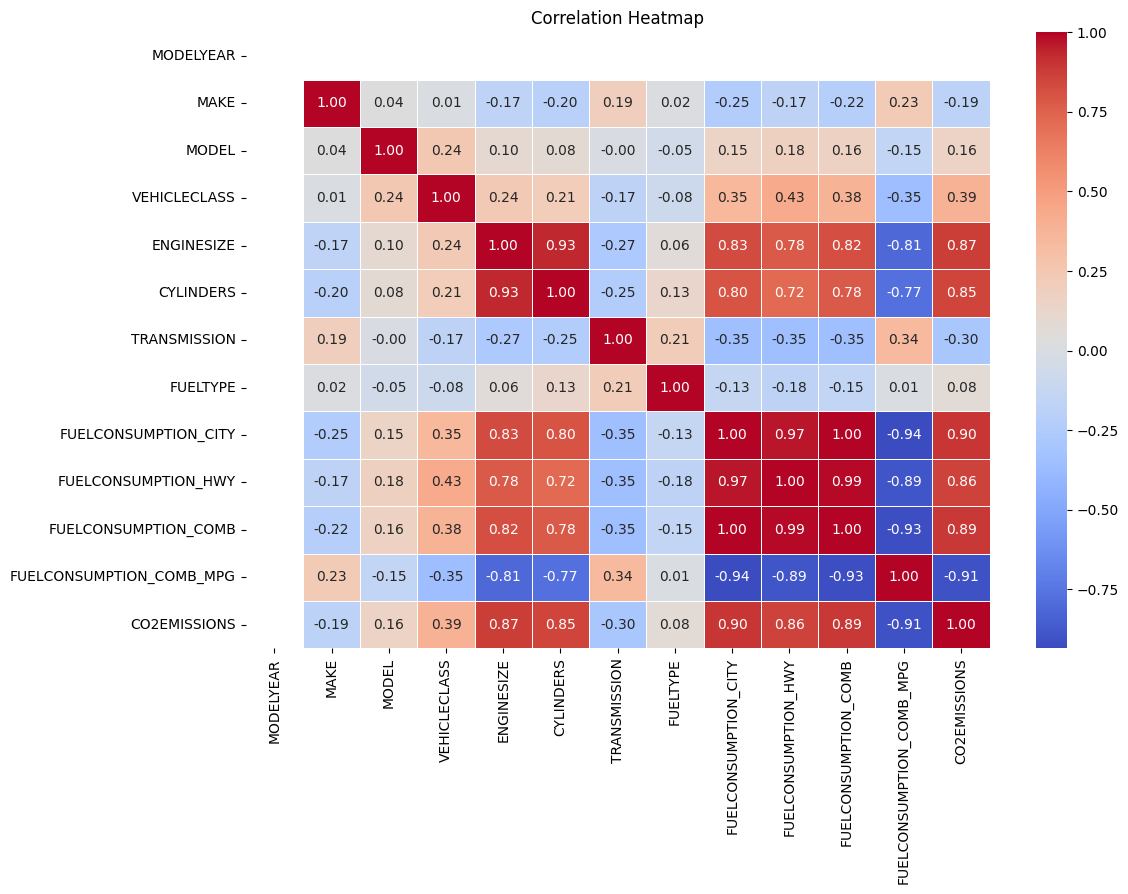

R² Score: 0.9188
Mean Squared Error: 335.6547


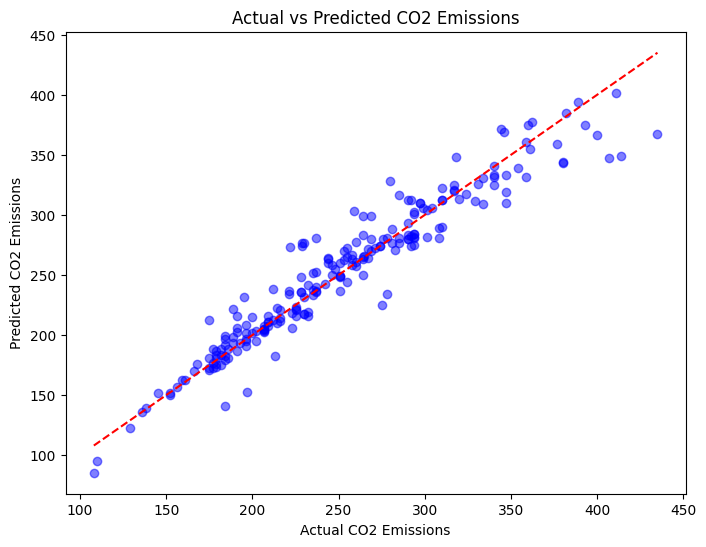

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('fuel_consumption_dataset.csv')

# Clean rows with missing data
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical columns
ld = LabelEncoder()
df['MAKE'] = ld.fit_transform(df['MAKE'])
df['MODEL'] = ld.fit_transform(df['MODEL'])
df['VEHICLECLASS'] = ld.fit_transform(df['VEHICLECLASS'])
df['TRANSMISSION'] = ld.fit_transform(df['TRANSMISSION'])
df['FUELTYPE'] = ld.fit_transform(df['FUELTYPE'])

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CO2 emissions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()

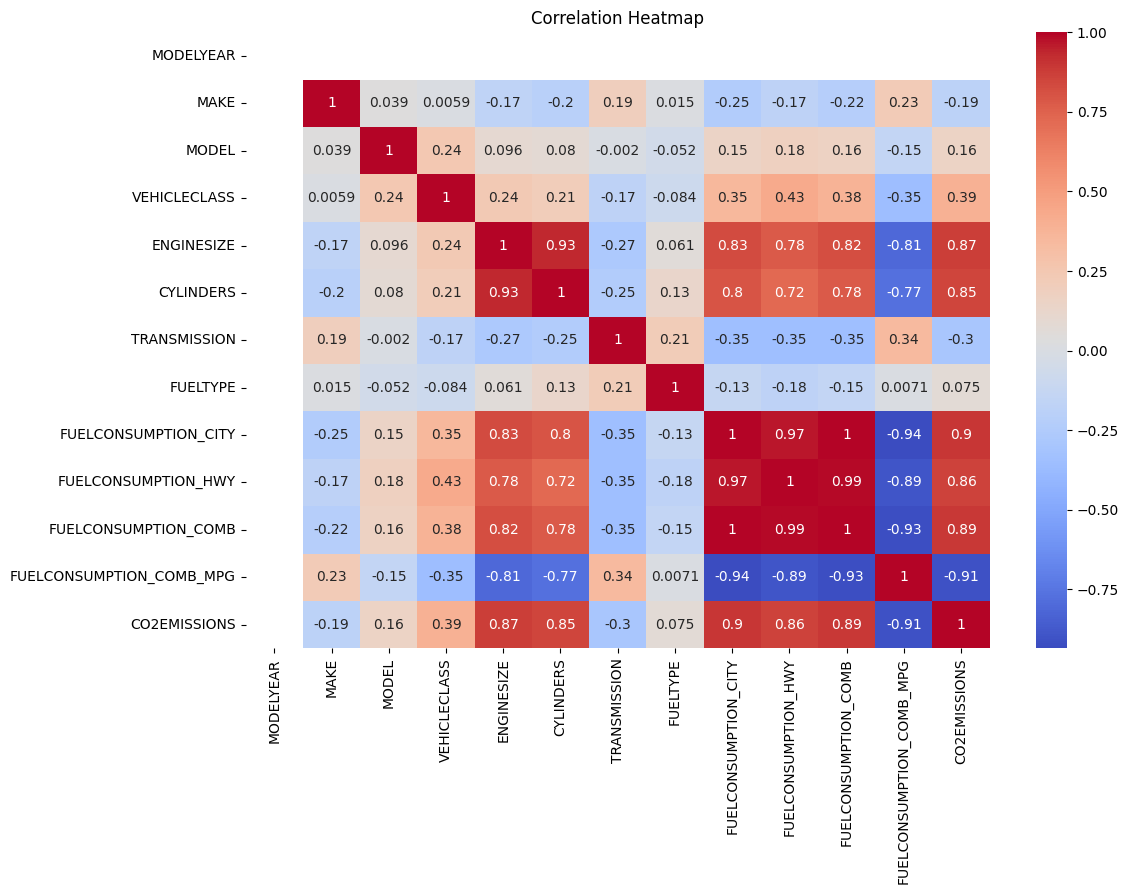

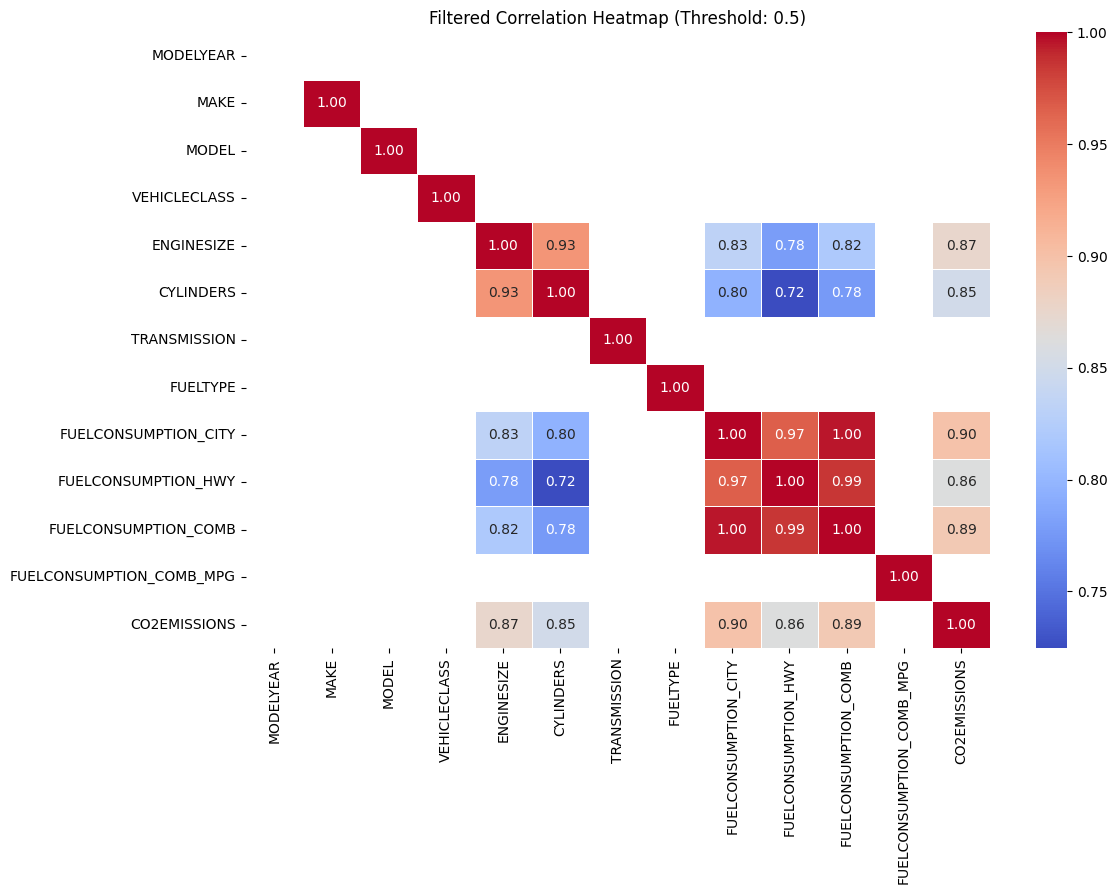

Highly correlated features (above threshold):
CO2EMISSIONS and FUELCONSUMPTION_COMB: 0.89
CO2EMISSIONS and FUELCONSUMPTION_CITY: 0.90
ENGINESIZE and FUELCONSUMPTION_HWY: 0.78
CYLINDERS and ENGINESIZE: 0.93
FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY: 0.97
CYLINDERS and FUELCONSUMPTION_CITY: 0.80
FUELCONSUMPTION_COMB and FUELCONSUMPTION_HWY: 0.99
CYLINDERS and FUELCONSUMPTION_HWY: 0.72
CO2EMISSIONS and ENGINESIZE: 0.87
ENGINESIZE and FUELCONSUMPTION_CITY: 0.83
ENGINESIZE and FUELCONSUMPTION_COMB: 0.82
CYLINDERS and FUELCONSUMPTION_COMB: 0.78
CO2EMISSIONS and CYLINDERS: 0.85
CO2EMISSIONS and FUELCONSUMPTION_HWY: 0.86
FUELCONSUMPTION_CITY and FUELCONSUMPTION_COMB: 1.00

Unique features with high correlation:
['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('fuel_consumption_dataset.csv')

# Clean rows with missing data
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)

# Encode categorical columns
ld = LabelEncoder()
df['MAKE'] = ld.fit_transform(df['MAKE'])
df['MODEL'] = ld.fit_transform(df['MODEL'])
df['VEHICLECLASS'] = ld.fit_transform(df['VEHICLECLASS'])
df['TRANSMISSION'] = ld.fit_transform(df['TRANSMISSION'])
df['FUELTYPE'] = ld.fit_transform(df['FUELTYPE'])

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



# Set a threshold value
threshold = 0.5

# Filter the correlation matrix
filtered_corr = correlation_matrix[(correlation_matrix >= threshold) ]

# Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f"Filtered Correlation Heatmap (Threshold: {threshold})")
plt.show()




# Filter the correlation matrix
filtered_corr = correlation_matrix[(correlation_matrix >= threshold) ]

# Extract feature pairs with high correlation
high_corr_features = []
for col in filtered_corr.columns:
    for row in filtered_corr.index:
        if row != col and abs(filtered_corr.loc[row, col]) >= threshold:
            high_corr_features.append((row, col, filtered_corr.loc[row, col]))

# Remove duplicates (e.g., (A, B) and (B, A))
unique_high_corr_features = list(set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_features))

# Print the features
print("Highly correlated features (above threshold):")
for feature_pair in unique_high_corr_features:
    print(f"{feature_pair[0]} and {feature_pair[1]}: {feature_pair[2]:.2f}")

# Optional: Extract unique features into a list
unique_features = list(set([feature for pair in unique_high_corr_features for feature in pair[:2]]))
print("\nUnique features with high correlation:")
print(unique_features)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   int64  
 2   MODEL                     1067 non-null   int64  
 3   VEHICLECLASS              1067 non-null   int64  
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   int64  
 7   FUELTYPE                  1067 non-null   int64  
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 108.5 KB
